In [35]:
# См. ур-ния Лагранжа

In [ ]:
# https://github.com/Josephbakulikira/Double-Pendulum-with-Python-pygame

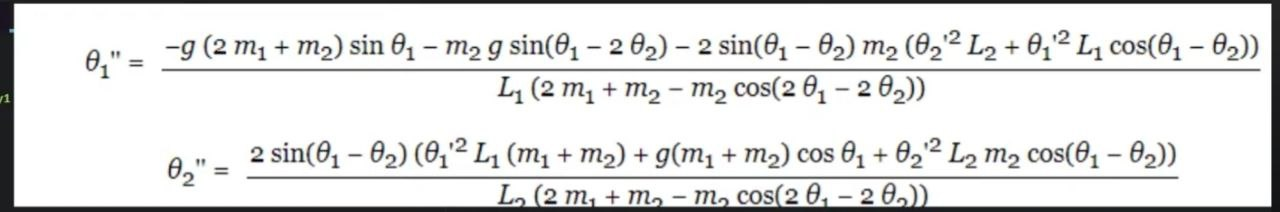

In [1]:
import tkinter as tk
import math

In [4]:
# Константы
g = 9.81 
length1 = 150  
length2 = 150
length3 = 150
mass1 = 10
mass2 = 10
angle1 = math.pi / 2  
angle2 = math.pi / 4
angle1_v = 0
angle2_v = 0
stab_coeff = 0.95 # Для стабилизации угловой скорости (Ошибка OverflowError: (34, 'Result too large'))

root = tk.Tk()
root.title("Лаба 3.1 Двойной маятник")
canvas = tk.Canvas(root, width=800, height=600, bg="black")
canvas.pack()

origin_x = 400
origin_y = 100

# Рисуем маятники
def draw_(x1, y1, x2, y2):
    canvas.delete("all")
    
    # 1-й маятник (белый)
    canvas.create_line(origin_x, origin_y, x1, y1, width=2, fill="white")
    canvas.create_oval(x1-10, y1-10, x1+10, y1+10, fill="white")
    
    # 2-й маятник (зелёный)
    canvas.create_line(x1, y1, x2, y2, width=2, fill="green")
    canvas.create_oval(x2-10, y2-10, x2+10, y2+10, fill="green", outline="white", width=2)

# Обновляем изображение
def update_():
    global angle1, angle2, angle3, angle1_v, angle2_v, angle3_v

    # Уравнения движения для 1-ого и 2-ого маятников
    num1 = -g * (2 * mass1 + mass2) * math.sin(angle1)
    num2 = -mass2 * g * math.sin(angle1 - 2 * angle2)
    num3 = -2 * math.sin(angle1 - angle2) * mass2
    num4 = angle2_v ** 2 * length2 + angle1_v ** 2 * length1 * math.cos(angle1 - angle2)
    den = length1 * (2 * mass1 + mass2 - mass2 * math.cos(2 * angle1 - 2 * angle2))
    angle1_a = (num1 + num2 + num3 * num4) / den

    num1 = 2 * math.sin(angle1 - angle2)
    num2 = (angle1_v ** 2 * length1 * (mass1 + mass2) + g * (mass1 + mass2) * math.cos(angle1) +
            angle2_v ** 2 * length2 * mass2 * math.cos(angle1 - angle2))
    den = length2 * (2 * mass1 + mass2 - mass2 * math.cos(2 * angle1 - 2 * angle2))
    angle2_a = (num1 * num2) / den

    angle1_v += angle1_a
    angle2_v += angle2_a

    angle1_v *= stab_coeff
    angle2_v *= stab_coeff

    angle1 += angle1_v
    angle2 += angle2_v

    # Координаты концов маятников
    x1 = origin_x + length1 * math.sin(angle1)
    y1 = origin_y + length1 * math.cos(angle1)
    x2 = x1 + length2 * math.sin(angle2)
    y2 = y1 + length2 * math.cos(angle2)

    draw_(x1, y1, x2, y2)

    canvas.after(50, update_)

update_()
root.mainloop()

In [5]:
# Константы
g = 9.81 
length1 = 150  
length2 = 150
length3 = 150
mass1 = 10
mass2 = 10
mass3 = 10
angle1 = math.pi / 2 
angle2 = math.pi
angle3 = math.pi / 2
angle1_v = 0
angle2_v = 0
angle3_v = 0
stab_coeff = 0.95 # Для стабилизации угловой скорости (Ошибка OverflowError: (34, 'Result too large'))

root = tk.Tk()
root.title("Лаба 3.2 Тройной маятник")
canvas = tk.Canvas(root, width=800, height=600, bg="black")
canvas.pack()

origin_x = 400
origin_y = 100

# Рисуем маятники
def draw_(x1, y1, x2, y2, x3, y3):
    canvas.delete("all")
    
    # 1-й маятник (белый)
    canvas.create_line(origin_x, origin_y, x1, y1, width=2, fill="white")
    canvas.create_oval(x1-10, y1-10, x1+10, y1+10, fill="white")
    
    # 2-й маятник (зелёный)
    canvas.create_line(x1, y1, x2, y2, width=2, fill="green")
    canvas.create_oval(x2-10, y2-10, x2+10, y2+10, fill="green", outline="white", width=2)
    
    # 3-й маятник (оранжевый)
    canvas.create_line(x2, y2, x3, y3, width=2, fill="orange")
    canvas.create_oval(x3-10, y3-10, x3+10, y3+10, fill="orange", outline="white", width=2)

# Обновляем изображение
def update_():
    global angle1, angle2, angle3, angle1_v, angle2_v, angle3_v

    num1 = -g * (2 * mass1 + mass2 + mass3) * math.sin(angle1)
    num2 = -mass2 * g * math.sin(angle1 - 2 * angle2)
    num3 = -mass3 * g * math.sin(angle1 - 2 * angle3)
    num4 = -2 * math.sin(angle1 - angle2) * mass2 * (angle2_v ** 2 * length2 + angle1_v ** 2 * length1 * math.cos(angle1 - angle2))
    num5 = -2 * math.sin(angle1 - angle3) * mass3 * (angle3_v ** 2 * length3 + angle1_v ** 2 * length1 * math.cos(angle1 - angle3))
    den = length1 * (2 * mass1 + mass2 + mass3 - mass2 * math.cos(2 * angle1 - 2 * angle2) - mass3 * math.cos(2 * angle1 - 2 * angle3))
    angle1_a = (num1 + num2 + num3 + num4 + num5) / den

    num1 = 2 * math.sin(angle1 - angle2) * (angle1_v ** 2 * length1 * (mass1 + mass2) + g * (mass1 + mass2) * math.cos(angle1))
    num2 = mass2 * angle2_v ** 2 * length2 * math.cos(angle1 - angle2)
    den = length2 * (2 * mass1 + mass2 - mass2 * math.cos(2 * angle1 - 2 * angle2))
    angle2_a = (num1 + num2) / den

    num1 = 2 * math.sin(angle1 - angle3) * (angle1_v ** 2 * length1 * (mass1 + mass3) + g * (mass1 + mass3) * math.cos(angle1))
    num2 = mass3 * angle3_v ** 2 * length3 * math.cos(angle1 - angle3)
    den = length3 * (2 * mass1 + mass3 - mass3 * math.cos(2 * angle1 - 2 * angle3))
    angle3_a = (num1 + num2) / den

    angle1_v += angle1_a
    angle2_v += angle2_a
    angle3_v += angle3_a

    angle1_v *= stab_coeff
    angle2_v *= stab_coeff
    angle3_v *= stab_coeff

    angle1 += angle1_v
    angle2 += angle2_v
    angle3 += angle3_v

    # Координаты концов маятников
    x1 = origin_x + length1 * math.sin(angle1)
    y1 = origin_y + length1 * math.cos(angle1)
    x2 = x1 + length2 * math.sin(angle2)
    y2 = y1 + length2 * math.cos(angle2)
    x3 = x2 + length3 * math.sin(angle3)
    y3 = y2 + length3 * math.cos(angle3)

    draw_(x1, y1, x2, y2, x3, y3)

    canvas.after(50, update_)

update_()
root.mainloop()